In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

In [2]:
import os # 모델 저장할 폴더가 있는지 여부와 폴더 생성
import numpy as np
import pandas as pd # get_dummies, crosstab
import seaborn as sns # iris 데이터 가져오기
from sklearn import datasets # iris 데이터 (X,y) 가져오기
from sklearn.preprocessing import LabelEncoder # 라벨인코더
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU
from tensorflow.keras import metrics # compile
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import matplotlib.pyplot as plt

- 데이터셋 생성(seaborn) & 전처리
    X,y(라벨인코딩-원핫인코딩)분리 -> train과 test셋 분리(8:2)
- 모델 구성(입력4 -> 출력3, layer5: 4->64->128->50->30->3)
- 모델 학습과정 설정
- 모델 학습(EarlyStopping, ModelCheckpoint 추가)
- 모델평가(시각화, 현재모델과 저장된 최고의 모델 평가, 교차표==혼동행렬)
- 모델예측/저장

In [19]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
X_iris = iris.iloc[:,:-1].values
y_iris = iris.iloc[:,-1]
X_iris,y_iris

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
# 문자변수 원핫인코딩 방법1
encoder = LabelEncoder()
iris['y'] = encoder.transform(iris['species'])
display(iris.loc[::50])
# utils.to_categorical(iris['species'])[:5]
# to_categorical을 하려면 숫자필드로 라벨인코딩먼저
to_categorical(iris['y'])[::50]

In [5]:
Y_iris = pd.get_dummies(y_iris).to_numpy()
Y_iris

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [6]:
X_iris, Y_iris

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_iris,Y_iris,
                                                    train_size= 0.8,
                                                    stratify=Y_iris,
                                                    random_state=12)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [8]:
# 층화 추출했는지 확인 
pd.Series(np.argmax(Y_train, axis=1)).value_counts()

0    40
2    40
1    40
dtype: int64

In [9]:
pd.Series(np.argmax(Y_test, axis=1)).value_counts()

0    10
2    10
1    10
dtype: int64

# 2. 모델 구성
(입력4 -> 출력3, layer5: 4->64->128->50->30->3)

In [10]:
model = Sequential()
model.add(Dense(units=64, input_dim=4, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                6450      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0

# 3. 모델 학습과정 설정

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습
(Earlystopping, ModelCheckpoint추가)

In [12]:
model_save_folder = './model/'
import os
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder)
file = model_save_folder\
        +'iris-{epochs}'
# 콜백객체
checkpoint = ModelCheckpoint(
                    filepath=file,
                    monitor='val_accuracy', # 모니터링 지표:loss, val_loss, accuracy
                    save_best_only=True,    # 모니터링 지표가 개선된 경우만 저장
                    mode = 'max',
                    verbose=1) # 로그 출력 여부
earlystopping = EarlyStopping(patience=40)# monitor='val_loss' 기본값
hist=model.fit(X_train,Y_train,batch_size=40,
               epochs=200,
               validation_split=0.2,
               callbacks=[checkpoint,earlystopping])

Epoch 1/200
1/3 [=========>....................] - ETA: 1s - loss: 1.1618 - accuracy: 0.3750
Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to ./model\iris-001-loss1.0205-acc0.3750.h5
3/3 [==============================] - 1s 188ms/step - loss: 1.1386 - accuracy: 0.3438 - val_loss: 1.0205 - val_accuracy: 0.3750
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 1.0996 - accuracy: 0.3250
Epoch 2: val_accuracy improved from 0.37500 to 0.87500, saving model to ./model\iris-002-loss0.9312-acc0.8750.h5
3/3 [==============================] - 0s 34ms/step - loss: 1.0945 - accuracy: 0.3125 - val_loss: 0.9312 - val_accuracy: 0.8750
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 0.9767 - accuracy: 0.5250
Epoch 3: val_accuracy improved from 0.87500 to 0.91667, saving model to ./model\iris-003-loss0.8688-acc0.9167.h5
3/3 [==============================] - 0s 36ms/step - loss: 0.9752 - accuracy: 0.5521 - val_loss: 0.8688 - val_accuracy: 0.9167


Epoch 30/200
1/3 [=========>....................] - ETA: 0s - loss: 0.3492 - accuracy: 0.8500
Epoch 30: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.2761 - accuracy: 0.8854 - val_loss: 0.1474 - val_accuracy: 1.0000
Epoch 31/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2720 - accuracy: 0.8750
Epoch 31: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 15ms/step - loss: 0.2092 - accuracy: 0.9271 - val_loss: 0.1393 - val_accuracy: 0.9583
Epoch 32/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1954 - accuracy: 0.9000
Epoch 32: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 15ms/step - loss: 0.2216 - accuracy: 0.8854 - val_loss: 0.1515 - val_accuracy: 0.9167
Epoch 33/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2355 - accuracy: 0.9500
Epoch 33: val_accuracy did not improve from 1.00000
3/3 [===========================

Epoch 60/200
1/3 [=========>....................] - ETA: 0s - loss: 0.3196 - accuracy: 0.8500
Epoch 60: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1796 - accuracy: 0.9167 - val_loss: 0.1027 - val_accuracy: 0.9583
Epoch 61/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1334 - accuracy: 0.9500
Epoch 61: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.1335 - accuracy: 0.9375 - val_loss: 0.0985 - val_accuracy: 0.9583
Epoch 62/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1732 - accuracy: 0.9250
Epoch 62: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1508 - accuracy: 0.9479 - val_loss: 0.0730 - val_accuracy: 1.0000
Epoch 63/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1819 - accuracy: 0.9250
Epoch 63: val_accuracy did not improve from 1.00000
3/3 [===========================

Epoch 90/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1332 - accuracy: 0.9500
Epoch 90: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1010 - accuracy: 0.9688 - val_loss: 0.0905 - val_accuracy: 0.9583
Epoch 91/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1556 - accuracy: 0.9500
Epoch 91: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 15ms/step - loss: 0.1069 - accuracy: 0.9688 - val_loss: 0.1137 - val_accuracy: 0.9167
Epoch 92/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0801 - accuracy: 1.0000
Epoch 92: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 15ms/step - loss: 0.1545 - accuracy: 0.9479 - val_loss: 0.0727 - val_accuracy: 0.9583
Epoch 93/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1138 - accuracy: 0.9750
Epoch 93: val_accuracy did not improve from 1.00000
3/3 [===========================

Epoch 120/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1939 - accuracy: 0.9000
Epoch 120: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 20ms/step - loss: 0.1355 - accuracy: 0.9375 - val_loss: 0.0591 - val_accuracy: 1.0000
Epoch 121/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1146 - accuracy: 0.9500
Epoch 121: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 20ms/step - loss: 0.1111 - accuracy: 0.9375 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch 122/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1317 - accuracy: 0.9500
Epoch 122: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1131 - accuracy: 0.9688 - val_loss: 0.0955 - val_accuracy: 0.9583
Epoch 123/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1840 - accuracy: 0.9500
Epoch 123: val_accuracy did not improve from 1.00000
3/3 [===================

Epoch 150/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1124 - accuracy: 0.9750
Epoch 150: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.0988 - accuracy: 0.9583 - val_loss: 0.0468 - val_accuracy: 1.0000
Epoch 151/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1513 - accuracy: 0.9250
Epoch 151: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.0989 - accuracy: 0.9583 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 152/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1257 - accuracy: 0.9750
Epoch 152: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.1121 - accuracy: 0.9479 - val_loss: 0.0598 - val_accuracy: 0.9583
Epoch 153/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0910 - accuracy: 0.9500
Epoch 153: val_accuracy did not improve from 1.00000
3/3 [===================

Epoch 180/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0384 - accuracy: 1.0000
Epoch 180: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 15ms/step - loss: 0.1111 - accuracy: 0.9479 - val_loss: 0.0541 - val_accuracy: 1.0000
Epoch 181/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1078 - accuracy: 0.9500
Epoch 181: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 15ms/step - loss: 0.0973 - accuracy: 0.9583 - val_loss: 0.0667 - val_accuracy: 0.9583
Epoch 182/200
1/3 [=========>....................] - ETA: 0s - loss: 0.1268 - accuracy: 0.9750
Epoch 182: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 18ms/step - loss: 0.0986 - accuracy: 0.9792 - val_loss: 0.0786 - val_accuracy: 0.9583
Epoch 183/200
1/3 [=========>....................] - ETA: 0s - loss: 0.0948 - accuracy: 0.9750
Epoch 183: val_accuracy did not improve from 1.00000
3/3 [===================

# 5. 모델 평가
(시각화, 현재모델과 저장된 최고의 모델 평가, 교차표==혼동행렬)

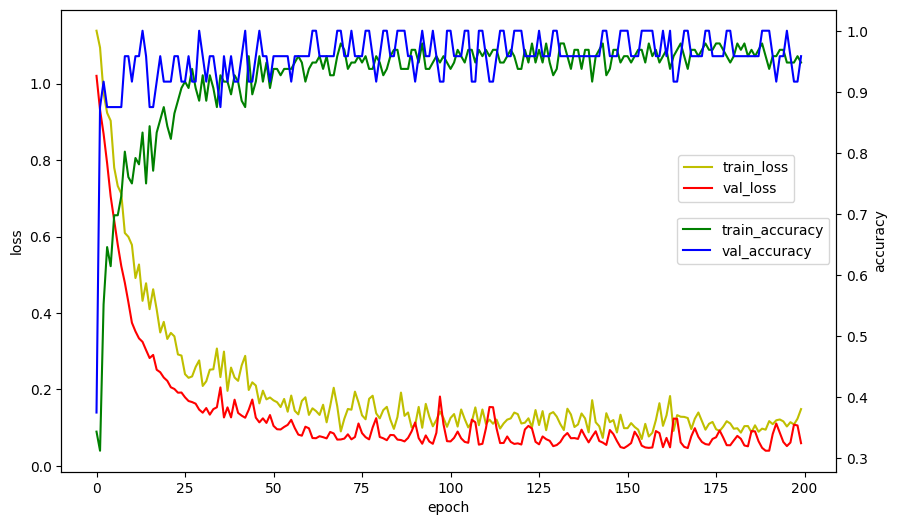

In [13]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [14]:
# 모델 평가
loss_and_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f'loss:{loss_and_acc[0]:.4f}, accuracy:{loss_and_acc[1]:.4f}')

loss:0.0167, accuracy:1.0000


In [15]:
model1 = load_model('model/iris-001-loss0.9736-acc0.6667.h5')
loss_and_acc1 =model1.evaluate(X_test, Y_test, verbose=0)
print(f'loss:{loss_and_acc1[0]:.4f}, accuracy:{loss_and_acc1[1]:.4f}')

loss:0.9779, accuracy:0.6667


In [16]:
model2 = load_model('model/iris-025-loss0.2361-acc1.0000.h5')
loss_and_acc2 =model2.evaluate(X_test, Y_test, verbose=0)
print(f'loss:{loss_and_acc2[0]:.4f}, accuracy:{loss_and_acc2[1]:.4f}')

loss:0.2121, accuracy:1.0000
